# Assigment 6 : Implement RandomSearchCV with k fold cross validation on KNN

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import random
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

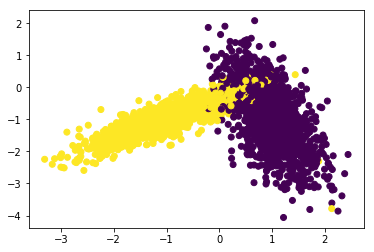

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom GridSearchCV

In [7]:
from sklearn.metrics import accuracy_score

def RandomSearchCV(X_train, y_train, classification , param_range, folds):
    trainscores = []
    testscores  = [] 

    param_list =  random.sample(range(1, param_range), 10)
    param_list.sort()    
    param = {'n_neighbors': param_list}

    for i in tqdm(param['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []

        for j in range(0, folds):
            avrg = (len(X_train)/ (folds))
            fold = int(avrg)

            CV =list(set(list(range((fold*j), (fold*(j+1))))))
            Train = list(set(list(range(0, len(X_train)))) - set(CV))
            
            X_Train = X_train[Train]
            Y_Train = y_train[Train]
            X_Test  = X_train[CV]
            Y_Test  = y_train[CV]
        
            classification.n_neighbors = i
            classification.fit(X_Train,Y_Train)
            
            Y_pred = classification.predict(X_Test)
            testscores_folds.append(accuracy_score(Y_Test, Y_pred))
            
            Y_pred = classification.predict(X_Train)
            trainscores_folds.append(accuracy_score(Y_Train, Y_pred))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))

    return trainscores,testscores,param


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.47s/it]


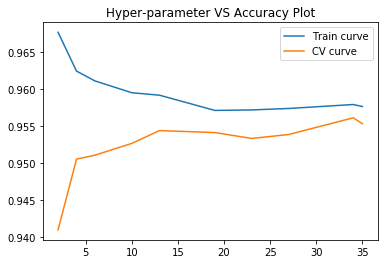

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier()

paramrange = 50

folds = 3

trainscores, testscores, param = RandomSearchCV(X_train, y_train, classifier, paramrange, folds)

plt.plot(param['n_neighbors'],trainscores, label='Train curve')
plt.plot(param['n_neighbors'],testscores, label='CV curve')
plt.title('Hyper-parameter VS Accuracy Plot')
plt.legend()
plt.show()

In [9]:
def plot_decision_boundary(X1, X2, y, clf):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

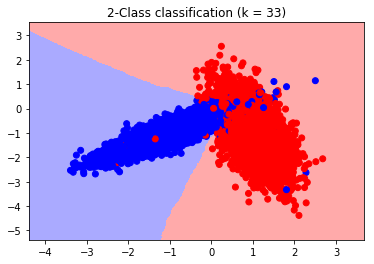

In [10]:
from matplotlib.colors import ListedColormap
classifier = KNeighborsClassifier(n_neighbors = 33)
classifier.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, classifier)